1 2.0 [0, 0] [1.0, 2.0]
2 0.17 [1.0, 2.0] [1.1000000000000001, 2.1699999999999999]
3 0.0149 [1.1000000000000001, 2.1699999999999999] [1.1100000000000001, 2.1848999999999998]
4 0.001343 [1.1100000000000001, 2.1848999999999998] [1.111, 2.1862430000000002]
5 0.00012401 [1.111, 2.1862430000000002] [1.1111, 2.1863670100000001]
6 1.16806999997e-05 [1.1111, 2.1863670100000001] [1.11111, 2.1863786906999998]
1 2.0 [0, 0] [1.0, 2.0]
2 0.2465 [1.0, 2.0] [1.145, 2.2465000000000002]
3 0.03132725 [1.145, 2.2465000000000002] [1.1660250000000001, 2.2778272500000001]
4 0.004094303375 [1.1660250000000001, 2.2778272500000001] [1.169073625, 2.2819215533750001]
5 0.000548186980062 [1.169073625, 2.2819215533750001] [1.169515675625, 2.2824697403550624]
6 7.48701806641e-05 [1.169515675625, 2.2824697403550624] [1.169579772965625, 2.2825446105357265]
1 2.0 [0, 0] [1.0, 2.0]
2 0.323 [1.0, 2.0] [1.1899999999999999, 2.323]
3 0.053789 [1.1899999999999999, 2.323] [1.2261, 2.376789]
4 0.009211637 [1.2261, 2.376789] [

8 1.10639358664 [8.4072792006616801, 9.9616648698443377] [9.5133899507013417, 11.068058456480511]
9 1.05660587524 [9.5133899507013417, 11.068058456480511] [10.569995825938888, 12.124583299033155]
10 1.0090044405 [10.569995825938888, 12.124583299033155] [11.578977050576663, 13.133587739535155]
11 0.963599240679 [11.578977050576663, 13.133587739535155] [12.542576291256072, 14.097180328869465]
12 0.920232828425 [12.542576291256072, 14.097180328869465] [13.462807214070338, 15.017413157294101]
13 0.878822351146 [13.462807214070338, 15.017413157294101] [14.341629565215866, 15.896234962482257]
14 0.839274980371 [14.341629565215866, 15.896234962482257] [15.180904389170555, 16.735509942853735]
15 0.801507606255 [15.180904389170555, 16.735509942853735] [15.982411995425316, 17.537017504295086]
16 0.765439734016 [15.982411995425316, 17.537017504295086] [16.747851716601808, 18.302457238310616]
17 0.730994945985 [16.747851716601808, 18.302457238310616] [17.478846662586637, 19.033452180617065]
18 0.6

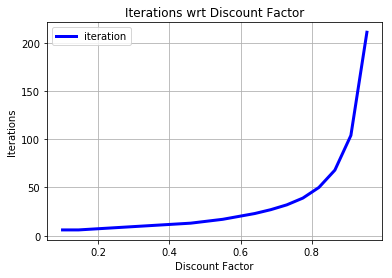

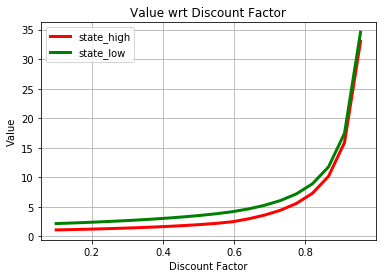

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt

alpha = 0.7
beta = 0.5
rSearch = 2
rWait = 1
discount = np.linspace(0.1, 1, 20, endpoint=False)

# Initialization
initialValue = [0, 0]

iteration = np.empty(shape=(1,))
value = np.empty(shape=(2,))
# Value Iteration
for i in range(0,discount.size):
	itr = 0
	newValue = copy.copy(initialValue)
	termCond = 10
	dis = discount[i]
	while (termCond > 10**(-4)):
		
		oldValue = copy.copy(newValue)
		newValue[1] = max((rSearch + dis*(alpha*oldValue[1] + (1 - alpha)*oldValue[0])),
						(rWait + dis*oldValue[1]))
		newValue[0] = max((beta*rSearch - 3*(1-beta) + dis*((1-beta)*oldValue[1] + beta*oldValue[0])),
						(rWait + dis*oldValue[0]), (dis*oldValue[1]))
		termCond = max((newValue[1] - oldValue[1]), (newValue[0] - oldValue[0]))
		itr += 1
		print(itr, termCond, oldValue, newValue)
	iteration = np.hstack((iteration, np.array(itr)))
	# for j in range(1,len(newValue)):
	value = np.vstack((value, np.array(newValue)))

final_index = discount.size + 1
xAxis = np.linspace(0.1, 1, 20, endpoint=False)
plt.figure(1)
plt.plot(xAxis, iteration[1:final_index], linewidth=3,label='iteration',color='b')
plt.title('Iterations wrt Discount Factor')
plt.legend()
plt.ylabel('Iterations')
plt.xlabel('Discount Factor')
plt.grid()

plt.figure(2)
plt.plot(xAxis, np.transpose(value)[0][1:final_index], linewidth=3,label='state_high',color='r')
plt.plot(xAxis, np.transpose(value)[1][1:final_index], linewidth=3,label='state_low',color='g')
plt.title('Value wrt Discount Factor')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Discount Factor')
plt.grid()
plt.show()